# Flight ticket price prediction using Machine learning techniques

In [96]:
#Basic Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Sklearn Libraries for data preprocessing and 
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Keras and Tensorflow Libraries for deep learning
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import LeakyReLU

In [97]:
#Importing dataset
flight_train= pd.read_excel('Data.xlsx')
flight_test= pd.read_excel('Test_set.xlsx')

In [98]:
#Looking at dataset
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [99]:
#Looking at dataset
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [100]:
#Combining the train and test set
flight_append= flight_train.append(flight_test, sort=False)

In [101]:
#Complete dataset top 5
flight_append.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [102]:
#Complete dataset bottom 5
flight_append.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [103]:
#Datatypes description
flight_append.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [104]:
#Creating three different columns for Date, Month, Year
flight_append['Date'] = flight_append['Date_of_Journey'].str.split('/').str[0]
flight_append['Month'] = flight_append['Date_of_Journey'].str.split('/').str[1]
flight_append['Year'] = flight_append['Date_of_Journey'].str.split('/').str[2]

In [105]:
flight_append.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [106]:
flight_append.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
dtype: object

In [107]:
#Changing the type of the column
flight_append['Date']= flight_append['Date'].astype(int)
flight_append['Month']= flight_append['Month'].astype(int)
flight_append['Year'] = flight_append['Year'].astype(int)

In [108]:
flight_append.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [109]:
flight_append.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [110]:
#Dropping Date_of_journey column
flight_append = flight_append.drop(['Date_of_Journey'], axis=1)

In [111]:
flight_append.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [112]:
#Creating new column of arrival time by splitting the Arrival Time string
flight_append['Arrival_Time']= flight_append['Arrival_Time'].str.split(' ').str[0]

In [113]:
flight_append.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [114]:
#Imputing the values manually
flight_append[flight_append['Total_Stops'].isnull()]

flight_append['Total_Stops']= flight_append['Total_Stops'].fillna('1 stop')

flight_append['Total_Stops'] = flight_append['Total_Stops'].replace('non-stop','0 stop')

In [115]:
flight_append.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [116]:
#Separating number of stops from the Total_Stops string
flight_append['Stop'] = flight_append['Total_Stops'].str.split(' ').str[0]

In [117]:
flight_append.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,1


In [118]:
flight_append.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Stop                object
dtype: object

In [119]:
#Converting splitted string to integer
flight_append['Stop'] =flight_append['Stop'].astype(int)

In [120]:
flight_append= flight_append.drop(['Total_Stops'], axis=1)

In [121]:
flight_append.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1


In [122]:
#Splitting time in Hour and Minutes
flight_append['Arrival_Hour'] = flight_append['Arrival_Time'].str.split(':').str[0]
flight_append['Arrival_Minute'] = flight_append['Arrival_Time'].str.split(':').str[1]

In [123]:
flight_append.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,0,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1,21,35


In [124]:
#Changing type to integer
flight_append['Arrival_Hour']= flight_append['Arrival_Hour'].astype(int)
flight_append['Arrival_Minute']= flight_append['Arrival_Minute'].astype(int)
flight_append=flight_append.drop(['Arrival_Time'], axis=1)

In [125]:
flight_append.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No info,3897.0,24,3,2019,0,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No info,7662.0,1,5,2019,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No info,13882.0,9,6,2019,2,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No info,6218.0,12,5,2019,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,No info,13302.0,1,3,2019,1,21,35


In [126]:
#Splitting departure time in Hours and Minutes and changing time to integer
flight_append['Departure_Hour'] = flight_append['Dep_Time'].str.split(':').str[0]
flight_append['Departure_Minute'] = flight_append['Dep_Time'].str.split(':').str[1]

flight_append['Departure_Hour']=flight_append['Departure_Hour'].astype(int)
flight_append['Departure_Minute']=flight_append['Departure_Minute'].astype(int)
flight_append=flight_append.drop(['Dep_Time'],axis=1)

In [127]:
flight_append.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50


In [128]:
#From the complete route creating separating columns
flight_append['Route1']= flight_append['Route'].str.split('→ ').str[0]
flight_append['Route2']= flight_append['Route'].str.split('→ ').str[1]
flight_append['Route3']= flight_append['Route'].str.split('→ ').str[2]
flight_append['Route4']= flight_append['Route'].str.split('→ ').str[3]
flight_append['Route5']= flight_append['Route'].str.split('→ ').str[4]

In [129]:
flight_append.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [130]:
#Imputing null values in Price
flight_append['Price'].fillna((flight_append['Price'].mean()), inplace=True)

In [131]:
#Filling N/A in Route to None
flight_append['Route1'].fillna("None", inplace=True)
flight_append['Route2'].fillna("None", inplace=True)
flight_append['Route3'].fillna("None", inplace=True)
flight_append['Route4'].fillna("None", inplace=True)
flight_append['Route5'].fillna("None", inplace=True)

In [132]:
flight_append.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [133]:
#Dropping Route and Duration Column
flight_append= flight_append.drop(['Route'], axis=1)

flight_append= flight_append.drop(['Duration'], axis=1)

In [134]:
flight_append.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [135]:
flight_append.isnull().sum()

Airline             0
Source              0
Destination         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Stop                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Route1              0
Route2              0
Route3              0
Route4              0
Route5              0
dtype: int64

# Checking for outliers

Text(0.5, 1.0, 'Distribution plot of flight ticket prices')

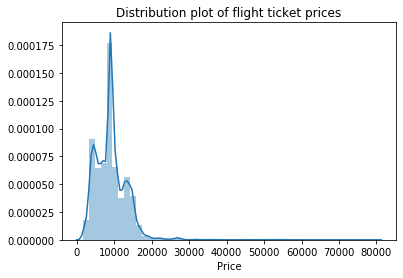

In [136]:
#Dist plot
sns.distplot(flight_append['Price'])
plt.title("Distribution plot of flight ticket prices")

In [137]:
#Changing additional information of flights by Knowledge and information of the dataset
flight_append.loc[flight_append['Additional_Info'] == 'Business class']

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route1,Route2,Route3,Route4,Route5
2924,Jet Airways Business,Banglore,New Delhi,Business class,79512.000000,1,3,2019,1,11,25,5,45,BLR,BOM,DEL,None,None
3032,Jet Airways,Banglore,New Delhi,Business class,28097.000000,1,3,2019,1,12,20,5,50,BLR,BDQ,DEL,None,None
5372,Jet Airways Business,Banglore,New Delhi,Business class,62427.000000,1,3,2019,1,12,25,5,45,BLR,BOM,DEL,None,None
10364,Jet Airways Business,Banglore,New Delhi,Business class,57209.000000,1,3,2019,1,14,25,9,45,BLR,MAA,DEL,None,None
1802,Jet Airways Business,Banglore,New Delhi,Business class,9087.064121,1,3,2019,1,13,15,5,45,BLR,BOM,DEL,None,None


# Fixing information of outliers

In [138]:
flight_append.loc[flight_append['Price'] > 30000, 'Additional_Info'] = 'Business class'

In [139]:
#Data preprocessing lable encoding
encoder= LabelEncoder()

In [140]:
#Transforming data with label encoder
flight_append['Airline']= encoder.fit_transform(flight_append['Airline'])
flight_append['Source']= encoder.fit_transform(flight_append['Source'])
flight_append['Destination'] = encoder.fit_transform(flight_append['Destination'])
flight_append['Additional_Info'] = encoder.fit_transform(flight_append['Additional_Info'])
flight_append['Route1']= encoder.fit_transform(flight_append['Route1'])
flight_append['Route2']= encoder.fit_transform(flight_append['Route2'])
flight_append['Route3']= encoder.fit_transform(flight_append['Route3'])
flight_append['Route4']= encoder.fit_transform(flight_append['Route4'])
flight_append['Route5']= encoder.fit_transform(flight_append['Route5'])

In [141]:
#Creting train and test sets, test set will be used as validation set
train_data = flight_append[0:10000]
test_data = flight_append[10000:]

In [142]:
X= train_data.drop(['Price'], axis=1)
y = train_data.Price

In [143]:
X = X.drop(['Year'], axis=1)

In [144]:
#Spliting Train set into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [145]:
#Creating a machine learning pipeline which tests multiple modle with different parameters
pipe1 = Pipeline([ ('regressor', RandomForestRegressor())])

param_grid1 = [
{'regressor': [RandomForestRegressor()], 'regressor__max_depth': [10,15,20,25,30]},
{'regressor': [GradientBoostingRegressor()], 'regressor__max_depth': [9,11,12,13,14],'regressor__max_features': [5,6,7,8,9]}]


In [146]:
#Fitting the data to the grid search where defined models will be tested
grid1 = GridSearchCV(pipe1, param_grid1, cv=5)
grid1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('regressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split=None,
                                                              min_samples_leaf=1,
                                                              min_samples_split=2,
                                                              min_weight_fraction_leaf=0.0,
                

In [147]:
#Best model will be chosen here and it will return best parameters and accuracy for the model
print(grid1.best_estimator_, '\n',
grid1.best_params_, '\n',
grid1.best_score_)

Pipeline(memory=None,
         steps=[('regressor',
                 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse',
                                           init=None, learning_rate=0.1,
                                           loss='ls', max_depth=9,
                                           max_features=9, max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100,
                                           n_iter_no_change=None,
                                           presort='auto', random_state=None,
                                           subsample=1.0, tol=0.0001,
                                   

In [149]:
#Evaluating performance of the model
from sklearn.metrics import mean_absolute_error, mean_squared_error , mean_squared_log_error
preds = grid1.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
rmsle = np.sqrt(mean_squared_log_error(y_test, preds))
print("Score: %f" % (1-rmsle))

RMSE: 1096.123279
Score: 0.891176


Text(0.5, 1.0, 'Actual vs Predicted ticket prices')

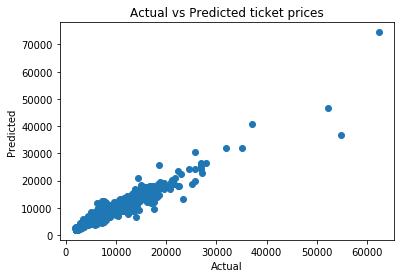

In [150]:
#This graph plots actual vs predicted values, in here the narrower the graph, better the model is performing
plt.scatter(y_test,preds)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted ticket prices")

# XGBoost

In [152]:
#This is our third ML model
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor(n_jobs=500, max_depth=30,n_estimators=250)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
#Fitting the data to the model, the model learns the data when we use fit method. 
xgb.fit(X_train, y_train)

In [ ]:
#Predicting the values
preds = xgb.predict(X_test)

In [ ]:
#Evaluating performance of the third model. 
from sklearn.metrics import mean_squared_error , accuracy_score
rmsle = np.sqrt(mean_squared_log_error(y_test, preds))
print("Score: %f" % (1-rmsle))

In [ ]:
#This graph plots actual vs predicted values, in here the narrower the graph, better the model is performing
plt.scatter(y_test,preds)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted ticket prices")

# Neural Network

In [76]:
#This is our final model The neural network

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(X_train.shape[1], kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))


NN_model.add(Dense(128, kernel_initializer= 'normal', activation= 'relu'))
NN_model.add(Dense(64, kernel_initializer= 'normal', activation= 'relu'))
NN_model.add(Dense(32, kernel_initializer= 'normal', activation= 'relu'))
NN_model.add(Dense(16, kernel_initializer= 'normal', activation= 'relu'))
NN_model.add(Dense(8, kernel_initializer= 'normal', activation= 'relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               2176      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [77]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [79]:
History =  NN_model.fit(X_train, y_train, epochs=3000, batch_size=300 , validation_data = (X_test,y_test), verbose=1)

Train on 7500 samples, validate on 2500 samples
Epoch 1/3000
7500/7500 [==============================] - 0s 26us/step - loss: 9076.7077 - mean_squared_error: 103384312.0000 - val_loss: 9119.7642 - val_mean_squared_error: 104491104.0000
Epoch 2/3000
7500/7500 [==============================] - 0s 7us/step - loss: 9069.4963 - mean_squared_error: 103257768.0000 - val_loss: 9085.5894 - val_mean_squared_error: 103885616.0000
Epoch 3/3000
7500/7500 [==============================] - 0s 7us/step - loss: 8765.1970 - mean_squared_error: 98076352.0000 - val_loss: 8001.5571 - val_mean_squared_error: 85963264.0000
Epoch 4/3000
7500/7500 [==============================] - 0s 7us/step - loss: 5656.8686 - mean_squared_error: 50986292.0000 - val_loss: 4433.7975 - val_mean_squared_error: 31378748.0000
Epoch 5/3000
7500/7500 [==============================] - 0s 7us/step - loss: 4259.8302 - mean_squared_error: 29466646.0000 - val_loss: 4128.0444 - val_mean_squared_error: 28762882.0000
Epoch 6/3000
7500

Epoch 88/3000
7500/7500 [==============================] - 0s 6us/step - loss: 2010.6760 - mean_squared_error: 9630892.0000 - val_loss: 2045.2059 - val_mean_squared_error: 10645171.0000
Epoch 89/3000
7500/7500 [==============================] - 0s 6us/step - loss: 2004.4111 - mean_squared_error: 9633179.0000 - val_loss: 2051.3430 - val_mean_squared_error: 10537266.0000
Epoch 90/3000
7500/7500 [==============================] - 0s 6us/step - loss: 2002.5626 - mean_squared_error: 9578483.0000 - val_loss: 2045.0159 - val_mean_squared_error: 10549508.0000
Epoch 91/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1999.1008 - mean_squared_error: 9549866.0000 - val_loss: 2031.5399 - val_mean_squared_error: 10555983.0000
Epoch 92/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1996.6240 - mean_squared_error: 9563512.0000 - val_loss: 2034.5954 - val_mean_squared_error: 10487044.0000
Epoch 93/3000
7500/7500 [==============================] - 0s 6us/step

7500/7500 [==============================] - 0s 7us/step - loss: 1620.4406 - mean_squared_error: 7555422.0000 - val_loss: 1716.5602 - val_mean_squared_error: 9096107.0000
Epoch 176/3000
7500/7500 [==============================] - 0s 7us/step - loss: 1622.2565 - mean_squared_error: 7556666.0000 - val_loss: 1699.0859 - val_mean_squared_error: 9040184.0000
Epoch 177/3000
7500/7500 [==============================] - 0s 7us/step - loss: 1610.6951 - mean_squared_error: 7522247.5000 - val_loss: 1687.3552 - val_mean_squared_error: 8957831.0000
Epoch 178/3000
7500/7500 [==============================] - 0s 7us/step - loss: 1601.5486 - mean_squared_error: 7503074.0000 - val_loss: 1675.7905 - val_mean_squared_error: 8863052.0000
Epoch 179/3000
7500/7500 [==============================] - 0s 7us/step - loss: 1600.0869 - mean_squared_error: 7461768.0000 - val_loss: 1679.4052 - val_mean_squared_error: 8828272.0000
Epoch 180/3000
7500/7500 [==============================] - 0s 7us/step - loss: 1598.

7500/7500 [==============================] - 0s 6us/step - loss: 1404.1622 - mean_squared_error: 6139923.0000 - val_loss: 1477.0487 - val_mean_squared_error: 7694502.5000
Epoch 264/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1392.7737 - mean_squared_error: 6122777.5000 - val_loss: 1472.0149 - val_mean_squared_error: 7662628.0000
Epoch 265/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1381.2131 - mean_squared_error: 6088605.5000 - val_loss: 1477.5138 - val_mean_squared_error: 7627766.0000
Epoch 266/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1391.6587 - mean_squared_error: 6108739.0000 - val_loss: 1484.9159 - val_mean_squared_error: 7646104.0000
Epoch 267/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1384.2017 - mean_squared_error: 6044980.5000 - val_loss: 1482.8120 - val_mean_squared_error: 7637434.5000
Epoch 268/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1374.

7500/7500 [==============================] - 0s 8us/step - loss: 1289.5795 - mean_squared_error: 5384026.0000 - val_loss: 1393.5608 - val_mean_squared_error: 6963364.0000
Epoch 352/3000
7500/7500 [==============================] - 0s 7us/step - loss: 1285.9969 - mean_squared_error: 5345657.0000 - val_loss: 1390.9205 - val_mean_squared_error: 7089689.5000
Epoch 353/3000
7500/7500 [==============================] - 0s 7us/step - loss: 1289.3506 - mean_squared_error: 5395496.0000 - val_loss: 1390.9793 - val_mean_squared_error: 6979099.0000
Epoch 354/3000
7500/7500 [==============================] - 0s 7us/step - loss: 1288.5668 - mean_squared_error: 5364834.5000 - val_loss: 1416.2800 - val_mean_squared_error: 7003024.5000
Epoch 355/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1293.5418 - mean_squared_error: 5397255.5000 - val_loss: 1402.1293 - val_mean_squared_error: 7081972.5000
Epoch 356/3000
7500/7500 [==============================] - 0s 7us/step - loss: 1293.

7500/7500 [==============================] - 0s 6us/step - loss: 1249.4954 - mean_squared_error: 5034229.0000 - val_loss: 1335.9147 - val_mean_squared_error: 6601912.0000
Epoch 440/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1238.7602 - mean_squared_error: 4990794.0000 - val_loss: 1376.5262 - val_mean_squared_error: 6597880.0000
Epoch 441/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1250.8611 - mean_squared_error: 5019731.0000 - val_loss: 1378.5187 - val_mean_squared_error: 6860522.5000
Epoch 442/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1248.5101 - mean_squared_error: 5044835.5000 - val_loss: 1358.3565 - val_mean_squared_error: 6725597.0000
Epoch 443/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1241.4245 - mean_squared_error: 5019314.5000 - val_loss: 1343.7723 - val_mean_squared_error: 6666395.0000
Epoch 444/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1236.

Epoch 527/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1198.0230 - mean_squared_error: 4713775.0000 - val_loss: 1300.1119 - val_mean_squared_error: 6186769.5000
Epoch 528/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1183.1823 - mean_squared_error: 4686722.5000 - val_loss: 1291.8122 - val_mean_squared_error: 6282339.5000
Epoch 529/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1187.2749 - mean_squared_error: 4669445.0000 - val_loss: 1307.9906 - val_mean_squared_error: 6239985.5000
Epoch 530/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1199.2274 - mean_squared_error: 4678856.5000 - val_loss: 1310.4199 - val_mean_squared_error: 6257012.0000
Epoch 531/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1183.6198 - mean_squared_error: 4663029.5000 - val_loss: 1312.2213 - val_mean_squared_error: 6200932.0000
Epoch 532/3000
7500/7500 [==============================] - 0s 6us/ste

7500/7500 [==============================] - 0s 6us/step - loss: 1179.8046 - mean_squared_error: 4630368.5000 - val_loss: 1299.8175 - val_mean_squared_error: 6179344.0000
Epoch 572/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1184.1032 - mean_squared_error: 4610863.0000 - val_loss: 1319.2684 - val_mean_squared_error: 6207888.0000
Epoch 573/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1179.4745 - mean_squared_error: 4616806.0000 - val_loss: 1296.8574 - val_mean_squared_error: 6252313.5000
Epoch 574/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1187.7647 - mean_squared_error: 4644615.5000 - val_loss: 1290.8103 - val_mean_squared_error: 6159488.0000
Epoch 575/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1181.5157 - mean_squared_error: 4638920.0000 - val_loss: 1295.6074 - val_mean_squared_error: 6215363.0000
Epoch 576/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1194.

7500/7500 [==============================] - 0s 6us/step - loss: 1165.3213 - mean_squared_error: 4545851.5000 - val_loss: 1301.4155 - val_mean_squared_error: 6088046.0000
Epoch 660/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1167.9961 - mean_squared_error: 4541292.5000 - val_loss: 1269.6508 - val_mean_squared_error: 6135390.0000
Epoch 661/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1168.1037 - mean_squared_error: 4531131.5000 - val_loss: 1307.2551 - val_mean_squared_error: 6135757.5000
Epoch 662/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1181.3741 - mean_squared_error: 4606313.5000 - val_loss: 1289.8432 - val_mean_squared_error: 6108547.5000
Epoch 663/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1174.2108 - mean_squared_error: 4563517.5000 - val_loss: 1280.3297 - val_mean_squared_error: 6035964.0000
Epoch 664/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1178.

7500/7500 [==============================] - 0s 7us/step - loss: 1144.5364 - mean_squared_error: 4418084.5000 - val_loss: 1264.8173 - val_mean_squared_error: 6126976.0000
Epoch 748/3000
7500/7500 [==============================] - 0s 7us/step - loss: 1137.6376 - mean_squared_error: 4425272.0000 - val_loss: 1282.5171 - val_mean_squared_error: 6067676.5000
Epoch 749/3000
7500/7500 [==============================] - 0s 7us/step - loss: 1152.9216 - mean_squared_error: 4444748.5000 - val_loss: 1259.9966 - val_mean_squared_error: 6007295.5000
Epoch 750/3000
7500/7500 [==============================] - 0s 7us/step - loss: 1149.6196 - mean_squared_error: 4421864.0000 - val_loss: 1254.7051 - val_mean_squared_error: 6042785.5000
Epoch 751/3000
7500/7500 [==============================] - 0s 8us/step - loss: 1138.1398 - mean_squared_error: 4444740.5000 - val_loss: 1261.5731 - val_mean_squared_error: 5962919.5000
Epoch 752/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1150.

7500/7500 [==============================] - 0s 6us/step - loss: 1134.8795 - mean_squared_error: 4353717.0000 - val_loss: 1234.0445 - val_mean_squared_error: 5875633.5000
Epoch 836/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1126.6057 - mean_squared_error: 4330801.5000 - val_loss: 1244.3934 - val_mean_squared_error: 5863527.0000
Epoch 837/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1135.7100 - mean_squared_error: 4352482.0000 - val_loss: 1239.8234 - val_mean_squared_error: 5840259.5000
Epoch 838/3000
7500/7500 [==============================] - 0s 7us/step - loss: 1133.2739 - mean_squared_error: 4318656.0000 - val_loss: 1239.6005 - val_mean_squared_error: 5884570.0000
Epoch 839/3000
7500/7500 [==============================] - 0s 7us/step - loss: 1134.2583 - mean_squared_error: 4356200.0000 - val_loss: 1232.1611 - val_mean_squared_error: 5885908.0000
Epoch 840/3000
7500/7500 [==============================] - 0s 7us/step - loss: 1127.

7500/7500 [==============================] - 0s 6us/step - loss: 1120.5560 - mean_squared_error: 4250591.5000 - val_loss: 1236.3291 - val_mean_squared_error: 5805660.0000
Epoch 924/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1119.7920 - mean_squared_error: 4263613.0000 - val_loss: 1233.5754 - val_mean_squared_error: 5846015.0000
Epoch 925/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1120.1443 - mean_squared_error: 4256885.5000 - val_loss: 1233.4523 - val_mean_squared_error: 5812100.5000
Epoch 926/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1113.6925 - mean_squared_error: 4258140.0000 - val_loss: 1232.6371 - val_mean_squared_error: 5790105.0000
Epoch 927/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1119.9885 - mean_squared_error: 4254467.0000 - val_loss: 1239.6926 - val_mean_squared_error: 5761865.0000
Epoch 928/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1117.

7500/7500 [==============================] - 0s 6us/step - loss: 1107.9718 - mean_squared_error: 4168529.2500 - val_loss: 1216.8700 - val_mean_squared_error: 5758623.5000
Epoch 1012/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1102.9838 - mean_squared_error: 4141644.7500 - val_loss: 1220.5145 - val_mean_squared_error: 5694115.5000
Epoch 1013/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1114.6359 - mean_squared_error: 4185760.0000 - val_loss: 1221.0564 - val_mean_squared_error: 5737579.5000
Epoch 1014/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1106.5148 - mean_squared_error: 4172449.5000 - val_loss: 1223.6856 - val_mean_squared_error: 5706042.0000
Epoch 1015/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1102.0889 - mean_squared_error: 4143515.7500 - val_loss: 1224.2855 - val_mean_squared_error: 5713564.5000
Epoch 1016/3000
7500/7500 [==============================] - 0s 6us/step - loss: 

Epoch 1055/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1108.1319 - mean_squared_error: 4190193.5000 - val_loss: 1216.5984 - val_mean_squared_error: 5636398.5000
Epoch 1056/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1102.9584 - mean_squared_error: 4129297.7500 - val_loss: 1206.5417 - val_mean_squared_error: 5650448.0000
Epoch 1057/3000
7500/7500 [==============================] - 0s 5us/step - loss: 1095.6453 - mean_squared_error: 4115429.7500 - val_loss: 1208.9714 - val_mean_squared_error: 5700899.0000
Epoch 1058/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1101.0502 - mean_squared_error: 4133515.2500 - val_loss: 1227.2264 - val_mean_squared_error: 5694145.5000
Epoch 1059/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1100.7022 - mean_squared_error: 4138001.7500 - val_loss: 1206.2652 - val_mean_squared_error: 5678377.0000
Epoch 1060/3000
7500/7500 [==============================] - 0s 6

Epoch 1099/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1102.7564 - mean_squared_error: 4092441.5000 - val_loss: 1220.9581 - val_mean_squared_error: 5659870.0000
Epoch 1100/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1092.1367 - mean_squared_error: 4095619.2500 - val_loss: 1201.8726 - val_mean_squared_error: 5649637.5000
Epoch 1101/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1095.6946 - mean_squared_error: 4122351.0000 - val_loss: 1222.0807 - val_mean_squared_error: 5670463.5000
Epoch 1102/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1095.6907 - mean_squared_error: 4083224.5000 - val_loss: 1213.6824 - val_mean_squared_error: 5647796.5000
Epoch 1103/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1101.7551 - mean_squared_error: 4108270.5000 - val_loss: 1221.5789 - val_mean_squared_error: 5710185.5000
Epoch 1104/3000
7500/7500 [==============================] - 0s 6

Epoch 1143/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1094.1453 - mean_squared_error: 4081232.0000 - val_loss: 1207.3857 - val_mean_squared_error: 5660705.0000
Epoch 1144/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1091.9557 - mean_squared_error: 4095873.5000 - val_loss: 1211.9224 - val_mean_squared_error: 5727688.5000
Epoch 1145/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1105.6336 - mean_squared_error: 4106067.5000 - val_loss: 1222.8775 - val_mean_squared_error: 5635351.0000
Epoch 1146/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1092.4894 - mean_squared_error: 4086600.2500 - val_loss: 1204.0221 - val_mean_squared_error: 5621867.5000
Epoch 1147/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1086.3439 - mean_squared_error: 4058407.5000 - val_loss: 1194.6982 - val_mean_squared_error: 5638544.0000
Epoch 1148/3000
7500/7500 [==============================] - 0s 6

Epoch 1187/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1090.8887 - mean_squared_error: 4063835.5000 - val_loss: 1218.6117 - val_mean_squared_error: 5530794.0000
Epoch 1188/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1090.2233 - mean_squared_error: 4042921.0000 - val_loss: 1221.5858 - val_mean_squared_error: 5679873.5000
Epoch 1189/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1098.2778 - mean_squared_error: 4077421.2500 - val_loss: 1245.2875 - val_mean_squared_error: 5655549.0000
Epoch 1190/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1094.8894 - mean_squared_error: 4066836.2500 - val_loss: 1191.1575 - val_mean_squared_error: 5615014.5000
Epoch 1191/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1080.9422 - mean_squared_error: 4001383.2500 - val_loss: 1200.0636 - val_mean_squared_error: 5652156.5000
Epoch 1192/3000
7500/7500 [==============================] - 0s 5

Epoch 1231/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1086.3328 - mean_squared_error: 4036707.0000 - val_loss: 1204.8312 - val_mean_squared_error: 5568866.0000
Epoch 1232/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1077.1920 - mean_squared_error: 4009696.7500 - val_loss: 1197.8125 - val_mean_squared_error: 5595266.0000
Epoch 1233/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1081.6548 - mean_squared_error: 4011473.0000 - val_loss: 1193.7597 - val_mean_squared_error: 5625113.5000
Epoch 1234/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1079.2266 - mean_squared_error: 4008675.5000 - val_loss: 1195.4958 - val_mean_squared_error: 5604383.5000
Epoch 1235/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1078.2206 - mean_squared_error: 4023329.7500 - val_loss: 1197.9207 - val_mean_squared_error: 5619939.5000
Epoch 1236/3000
7500/7500 [==============================] - 0s 6

Epoch 1275/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1073.1995 - mean_squared_error: 3992690.7500 - val_loss: 1193.0395 - val_mean_squared_error: 5612892.0000
Epoch 1276/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1079.0457 - mean_squared_error: 4025060.0000 - val_loss: 1199.1284 - val_mean_squared_error: 5562842.0000
Epoch 1277/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1072.8908 - mean_squared_error: 3990972.0000 - val_loss: 1194.4423 - val_mean_squared_error: 5585907.5000
Epoch 1278/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1070.2799 - mean_squared_error: 3975962.0000 - val_loss: 1201.9411 - val_mean_squared_error: 5616591.0000
Epoch 1279/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1075.8802 - mean_squared_error: 3985082.5000 - val_loss: 1207.6060 - val_mean_squared_error: 5749352.5000
Epoch 1280/3000
7500/7500 [==============================] - 0s 6

Epoch 1319/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1076.9972 - mean_squared_error: 4002602.2500 - val_loss: 1186.7203 - val_mean_squared_error: 5594753.0000
Epoch 1320/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1082.8901 - mean_squared_error: 4017596.0000 - val_loss: 1180.7266 - val_mean_squared_error: 5596249.5000
Epoch 1321/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1076.7431 - mean_squared_error: 3971453.0000 - val_loss: 1194.7394 - val_mean_squared_error: 5645478.0000
Epoch 1322/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1072.1594 - mean_squared_error: 3973684.7500 - val_loss: 1188.6650 - val_mean_squared_error: 5673816.0000
Epoch 1323/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1075.3344 - mean_squared_error: 3976426.0000 - val_loss: 1211.6358 - val_mean_squared_error: 5616901.5000
Epoch 1324/3000
7500/7500 [==============================] - 0s 6

Epoch 1363/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1066.0674 - mean_squared_error: 3962012.2500 - val_loss: 1179.8274 - val_mean_squared_error: 5636786.0000
Epoch 1364/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1095.5319 - mean_squared_error: 4037478.0000 - val_loss: 1188.2531 - val_mean_squared_error: 5590496.5000
Epoch 1365/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1078.8449 - mean_squared_error: 3977266.2500 - val_loss: 1217.6669 - val_mean_squared_error: 5619804.0000
Epoch 1366/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1065.6627 - mean_squared_error: 3940821.7500 - val_loss: 1201.4945 - val_mean_squared_error: 5604674.5000
Epoch 1367/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1074.2433 - mean_squared_error: 3992024.7500 - val_loss: 1194.1322 - val_mean_squared_error: 5577114.0000
Epoch 1368/3000
7500/7500 [==============================] - 0s 6

Epoch 1407/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1071.8860 - mean_squared_error: 3930332.2500 - val_loss: 1201.7264 - val_mean_squared_error: 5646733.5000
Epoch 1408/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1079.4918 - mean_squared_error: 3979233.7500 - val_loss: 1207.6773 - val_mean_squared_error: 5641310.5000
Epoch 1409/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1062.5378 - mean_squared_error: 3945508.2500 - val_loss: 1175.5999 - val_mean_squared_error: 5570724.5000
Epoch 1410/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1080.8408 - mean_squared_error: 3982614.7500 - val_loss: 1221.3605 - val_mean_squared_error: 5627552.5000
Epoch 1411/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1066.5019 - mean_squared_error: 3951179.7500 - val_loss: 1210.9435 - val_mean_squared_error: 5547353.0000
Epoch 1412/3000
7500/7500 [==============================] - 0s 6

Epoch 1451/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1059.7420 - mean_squared_error: 3912434.0000 - val_loss: 1192.5913 - val_mean_squared_error: 5565383.0000
Epoch 1452/3000
7500/7500 [==============================] - 0s 5us/step - loss: 1053.6475 - mean_squared_error: 3928629.2500 - val_loss: 1183.9952 - val_mean_squared_error: 5570565.5000
Epoch 1453/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1057.3038 - mean_squared_error: 3910653.5000 - val_loss: 1187.7084 - val_mean_squared_error: 5546556.5000
Epoch 1454/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1061.8148 - mean_squared_error: 3944142.7500 - val_loss: 1188.0161 - val_mean_squared_error: 5623453.5000
Epoch 1455/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1073.1786 - mean_squared_error: 3951243.7500 - val_loss: 1204.2375 - val_mean_squared_error: 5552436.5000
Epoch 1456/3000
7500/7500 [==============================] - 0s 6

Epoch 1495/3000
7500/7500 [==============================] - 0s 7us/step - loss: 1063.2647 - mean_squared_error: 3926614.0000 - val_loss: 1203.6913 - val_mean_squared_error: 5560744.0000
Epoch 1496/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1065.9910 - mean_squared_error: 3938180.0000 - val_loss: 1182.8280 - val_mean_squared_error: 5552383.0000
Epoch 1497/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1055.8660 - mean_squared_error: 3903090.2500 - val_loss: 1198.3475 - val_mean_squared_error: 5725429.5000
Epoch 1498/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1064.5609 - mean_squared_error: 3910116.2500 - val_loss: 1185.3937 - val_mean_squared_error: 5591261.5000
Epoch 1499/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1056.2003 - mean_squared_error: 3904826.2500 - val_loss: 1171.7833 - val_mean_squared_error: 5531050.0000
Epoch 1500/3000
7500/7500 [==============================] - 0s 6

Epoch 1539/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1056.0861 - mean_squared_error: 3892896.0000 - val_loss: 1174.9066 - val_mean_squared_error: 5482789.5000
Epoch 1540/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1053.5033 - mean_squared_error: 3892221.0000 - val_loss: 1192.9076 - val_mean_squared_error: 5564990.0000
Epoch 1541/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1075.0082 - mean_squared_error: 3958278.0000 - val_loss: 1182.1947 - val_mean_squared_error: 5543238.5000
Epoch 1542/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1058.8122 - mean_squared_error: 3881847.5000 - val_loss: 1193.6839 - val_mean_squared_error: 5552089.5000
Epoch 1543/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1049.9971 - mean_squared_error: 3891294.7500 - val_loss: 1180.1983 - val_mean_squared_error: 5501036.0000
Epoch 1544/3000
7500/7500 [==============================] - 0s 6

Epoch 1583/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1061.2155 - mean_squared_error: 3873425.0000 - val_loss: 1175.8893 - val_mean_squared_error: 5618627.0000
Epoch 1584/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1064.5613 - mean_squared_error: 3937742.7500 - val_loss: 1200.4605 - val_mean_squared_error: 5591741.0000
Epoch 1585/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1067.1360 - mean_squared_error: 3899790.7500 - val_loss: 1177.6850 - val_mean_squared_error: 5639891.0000
Epoch 1586/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1053.8110 - mean_squared_error: 3907135.5000 - val_loss: 1172.4420 - val_mean_squared_error: 5490426.0000
Epoch 1587/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1050.0634 - mean_squared_error: 3869215.2500 - val_loss: 1172.2645 - val_mean_squared_error: 5576277.0000
Epoch 1588/3000
7500/7500 [==============================] - 0s 6

Epoch 1670/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1055.4094 - mean_squared_error: 3836039.2500 - val_loss: 1183.7812 - val_mean_squared_error: 5614641.5000
Epoch 1671/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1061.7782 - mean_squared_error: 3898389.2500 - val_loss: 1199.9880 - val_mean_squared_error: 5485956.0000
Epoch 1672/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1057.4200 - mean_squared_error: 3860724.0000 - val_loss: 1165.8724 - val_mean_squared_error: 5546057.5000
Epoch 1673/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1076.4144 - mean_squared_error: 3972799.5000 - val_loss: 1230.0808 - val_mean_squared_error: 5595434.0000
Epoch 1674/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1062.3673 - mean_squared_error: 3884808.7500 - val_loss: 1172.9358 - val_mean_squared_error: 5524903.0000
Epoch 1675/3000
7500/7500 [==============================] - 0s 7

Epoch 1714/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1078.3040 - mean_squared_error: 3871144.2500 - val_loss: 1246.7009 - val_mean_squared_error: 5580731.0000
Epoch 1715/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1062.4340 - mean_squared_error: 3883296.2500 - val_loss: 1177.6218 - val_mean_squared_error: 5467753.5000
Epoch 1716/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1048.8423 - mean_squared_error: 3846927.2500 - val_loss: 1162.1582 - val_mean_squared_error: 5527446.5000
Epoch 1717/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1053.0231 - mean_squared_error: 3863899.5000 - val_loss: 1189.9926 - val_mean_squared_error: 5489072.0000
Epoch 1718/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1038.8125 - mean_squared_error: 3818003.5000 - val_loss: 1169.9406 - val_mean_squared_error: 5513703.5000
Epoch 1719/3000
7500/7500 [==============================] - 0s 7

Epoch 1758/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1043.7424 - mean_squared_error: 3820556.0000 - val_loss: 1167.8550 - val_mean_squared_error: 5590280.0000
Epoch 1759/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1046.5013 - mean_squared_error: 3819994.5000 - val_loss: 1186.0750 - val_mean_squared_error: 5461277.0000
Epoch 1760/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1043.4955 - mean_squared_error: 3832770.7500 - val_loss: 1175.4046 - val_mean_squared_error: 5489002.5000
Epoch 1761/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1042.2927 - mean_squared_error: 3822500.2500 - val_loss: 1168.0799 - val_mean_squared_error: 5472184.0000
Epoch 1762/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1046.3611 - mean_squared_error: 3800437.2500 - val_loss: 1169.5679 - val_mean_squared_error: 5482394.0000
Epoch 1763/3000
7500/7500 [==============================] - 0s 6

Epoch 1802/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1044.9115 - mean_squared_error: 3831070.7500 - val_loss: 1200.6969 - val_mean_squared_error: 5579879.0000
Epoch 1803/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1046.9287 - mean_squared_error: 3824029.5000 - val_loss: 1172.6949 - val_mean_squared_error: 5491969.0000
Epoch 1804/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1049.1720 - mean_squared_error: 3825779.5000 - val_loss: 1171.9803 - val_mean_squared_error: 5509877.5000
Epoch 1805/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1033.3330 - mean_squared_error: 3799738.5000 - val_loss: 1178.2275 - val_mean_squared_error: 5456506.5000
Epoch 1806/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1038.5256 - mean_squared_error: 3789959.0000 - val_loss: 1165.1202 - val_mean_squared_error: 5477671.5000
Epoch 1807/3000
7500/7500 [==============================] - 0s 6

Epoch 1846/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1034.5562 - mean_squared_error: 3801922.5000 - val_loss: 1164.7974 - val_mean_squared_error: 5456018.0000
Epoch 1847/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1037.4415 - mean_squared_error: 3801730.7500 - val_loss: 1175.1089 - val_mean_squared_error: 5594666.5000
Epoch 1848/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1062.9165 - mean_squared_error: 3865699.7500 - val_loss: 1173.9404 - val_mean_squared_error: 5446195.5000
Epoch 1849/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1035.2212 - mean_squared_error: 3788774.0000 - val_loss: 1162.6436 - val_mean_squared_error: 5449835.5000
Epoch 1850/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1029.8790 - mean_squared_error: 3777757.2500 - val_loss: 1168.7023 - val_mean_squared_error: 5415574.5000
Epoch 1851/3000
7500/7500 [==============================] - 0s 6

Epoch 1890/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1035.0823 - mean_squared_error: 3788435.7500 - val_loss: 1172.1979 - val_mean_squared_error: 5503160.0000
Epoch 1891/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1033.3755 - mean_squared_error: 3790262.0000 - val_loss: 1201.2982 - val_mean_squared_error: 5472030.0000
Epoch 1892/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1035.6189 - mean_squared_error: 3771467.0000 - val_loss: 1179.6580 - val_mean_squared_error: 5612833.0000
Epoch 1893/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1039.4168 - mean_squared_error: 3796188.7500 - val_loss: 1162.7437 - val_mean_squared_error: 5457155.0000
Epoch 1894/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1033.0426 - mean_squared_error: 3784137.5000 - val_loss: 1172.1769 - val_mean_squared_error: 5554686.5000
Epoch 1895/3000
7500/7500 [==============================] - 0s 6

Epoch 1934/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1029.7062 - mean_squared_error: 3760298.5000 - val_loss: 1164.1100 - val_mean_squared_error: 5478462.5000
Epoch 1935/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1040.6458 - mean_squared_error: 3811292.0000 - val_loss: 1205.0120 - val_mean_squared_error: 5462715.0000
Epoch 1936/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1037.1037 - mean_squared_error: 3808315.5000 - val_loss: 1174.4503 - val_mean_squared_error: 5473523.0000
Epoch 1937/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1031.6159 - mean_squared_error: 3776982.5000 - val_loss: 1164.4603 - val_mean_squared_error: 5495596.5000
Epoch 1938/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1040.6421 - mean_squared_error: 3816975.0000 - val_loss: 1168.8428 - val_mean_squared_error: 5498482.5000
Epoch 1939/3000
7500/7500 [==============================] - 0s 6

Epoch 1978/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1046.5182 - mean_squared_error: 3773539.5000 - val_loss: 1162.0939 - val_mean_squared_error: 5528809.5000
Epoch 1979/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1025.8960 - mean_squared_error: 3759469.0000 - val_loss: 1173.4380 - val_mean_squared_error: 5467654.0000
Epoch 1980/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1034.0823 - mean_squared_error: 3757547.0000 - val_loss: 1156.3788 - val_mean_squared_error: 5478327.0000
Epoch 1981/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1029.2398 - mean_squared_error: 3766703.2500 - val_loss: 1167.7239 - val_mean_squared_error: 5444203.5000
Epoch 1982/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1038.1017 - mean_squared_error: 3789198.5000 - val_loss: 1165.1306 - val_mean_squared_error: 5499979.5000
Epoch 1983/3000
7500/7500 [==============================] - 0s 6

Epoch 2022/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1047.0309 - mean_squared_error: 3787890.7500 - val_loss: 1186.6565 - val_mean_squared_error: 5588890.0000
Epoch 2023/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1040.9310 - mean_squared_error: 3801134.2500 - val_loss: 1158.2945 - val_mean_squared_error: 5486956.0000
Epoch 2024/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1029.4940 - mean_squared_error: 3741743.7500 - val_loss: 1154.1261 - val_mean_squared_error: 5387084.0000
Epoch 2025/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1025.0359 - mean_squared_error: 3732416.0000 - val_loss: 1173.0814 - val_mean_squared_error: 5481691.5000
Epoch 2026/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1028.6844 - mean_squared_error: 3760642.5000 - val_loss: 1181.1166 - val_mean_squared_error: 5449119.5000
Epoch 2027/3000
7500/7500 [==============================] - 0s 6

Epoch 2066/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1028.0597 - mean_squared_error: 3759464.0000 - val_loss: 1162.6831 - val_mean_squared_error: 5420678.5000
Epoch 2067/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1030.3918 - mean_squared_error: 3750488.2500 - val_loss: 1192.0907 - val_mean_squared_error: 5467945.0000
Epoch 2068/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1027.7008 - mean_squared_error: 3730449.7500 - val_loss: 1164.2928 - val_mean_squared_error: 5437928.0000
Epoch 2069/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1037.5076 - mean_squared_error: 3759624.5000 - val_loss: 1192.4904 - val_mean_squared_error: 5463458.0000
Epoch 2070/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1022.0241 - mean_squared_error: 3722689.5000 - val_loss: 1161.6749 - val_mean_squared_error: 5471075.0000
Epoch 2071/3000
7500/7500 [==============================] - 0s 6

Epoch 2110/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1023.2161 - mean_squared_error: 3741147.2500 - val_loss: 1157.1357 - val_mean_squared_error: 5395391.5000
Epoch 2111/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1022.0533 - mean_squared_error: 3725057.2500 - val_loss: 1148.7731 - val_mean_squared_error: 5427898.5000
Epoch 2112/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1022.4133 - mean_squared_error: 3750974.5000 - val_loss: 1169.8095 - val_mean_squared_error: 5568684.0000
Epoch 2113/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1026.7158 - mean_squared_error: 3718546.7500 - val_loss: 1165.9072 - val_mean_squared_error: 5449422.0000
Epoch 2114/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1031.4306 - mean_squared_error: 3727927.0000 - val_loss: 1148.7784 - val_mean_squared_error: 5481976.5000
Epoch 2115/3000
7500/7500 [==============================] - 0s 6

Epoch 2154/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1033.1572 - mean_squared_error: 3746492.7500 - val_loss: 1163.8950 - val_mean_squared_error: 5435831.0000
Epoch 2155/3000
7500/7500 [==============================] - 0s 7us/step - loss: 1029.4089 - mean_squared_error: 3716460.2500 - val_loss: 1161.6895 - val_mean_squared_error: 5393103.5000
Epoch 2156/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1021.3883 - mean_squared_error: 3684691.5000 - val_loss: 1150.5695 - val_mean_squared_error: 5412629.5000
Epoch 2157/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1018.6262 - mean_squared_error: 3692393.7500 - val_loss: 1161.8741 - val_mean_squared_error: 5399014.0000
Epoch 2158/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1025.3163 - mean_squared_error: 3723874.2500 - val_loss: 1155.2587 - val_mean_squared_error: 5413198.0000
Epoch 2159/3000
7500/7500 [==============================] - 0s 6

Epoch 2198/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1017.9289 - mean_squared_error: 3708116.0000 - val_loss: 1150.3237 - val_mean_squared_error: 5433401.0000
Epoch 2199/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1034.9489 - mean_squared_error: 3738697.5000 - val_loss: 1145.5709 - val_mean_squared_error: 5366536.0000
Epoch 2200/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1029.6271 - mean_squared_error: 3740873.0000 - val_loss: 1164.1804 - val_mean_squared_error: 5373917.0000
Epoch 2201/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1018.1032 - mean_squared_error: 3683083.2500 - val_loss: 1167.7999 - val_mean_squared_error: 5418938.0000
Epoch 2202/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1024.0519 - mean_squared_error: 3698083.0000 - val_loss: 1148.1033 - val_mean_squared_error: 5382311.0000
Epoch 2203/3000
7500/7500 [==============================] - 0s 6

Epoch 2242/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1012.9359 - mean_squared_error: 3665589.5000 - val_loss: 1137.0208 - val_mean_squared_error: 5357981.5000
Epoch 2243/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1015.2928 - mean_squared_error: 3689235.0000 - val_loss: 1184.0936 - val_mean_squared_error: 5365831.5000
Epoch 2244/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1034.4153 - mean_squared_error: 3695738.2500 - val_loss: 1188.3032 - val_mean_squared_error: 5396501.5000
Epoch 2245/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1023.6762 - mean_squared_error: 3698904.0000 - val_loss: 1149.8543 - val_mean_squared_error: 5406709.5000
Epoch 2246/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1017.1340 - mean_squared_error: 3685353.2500 - val_loss: 1160.8687 - val_mean_squared_error: 5354194.5000
Epoch 2247/3000
7500/7500 [==============================] - 0s 7

Epoch 2286/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1029.8650 - mean_squared_error: 3707972.7500 - val_loss: 1152.6643 - val_mean_squared_error: 5374948.0000
Epoch 2287/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1011.0057 - mean_squared_error: 3688208.7500 - val_loss: 1143.4096 - val_mean_squared_error: 5379576.5000
Epoch 2288/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1020.9721 - mean_squared_error: 3686859.0000 - val_loss: 1140.7581 - val_mean_squared_error: 5372504.5000
Epoch 2289/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1011.7265 - mean_squared_error: 3666891.0000 - val_loss: 1147.3692 - val_mean_squared_error: 5316335.5000
Epoch 2290/3000
7500/7500 [==============================] - 0s 7us/step - loss: 1015.3406 - mean_squared_error: 3661826.2500 - val_loss: 1162.1573 - val_mean_squared_error: 5400999.5000
Epoch 2291/3000
7500/7500 [==============================] - 0s 6

Epoch 2373/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1017.4400 - mean_squared_error: 3666352.5000 - val_loss: 1154.1289 - val_mean_squared_error: 5342060.0000
Epoch 2374/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1020.7919 - mean_squared_error: 3665947.2500 - val_loss: 1158.7192 - val_mean_squared_error: 5349528.0000
Epoch 2375/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1012.4310 - mean_squared_error: 3648147.7500 - val_loss: 1149.1078 - val_mean_squared_error: 5285067.5000
Epoch 2376/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1004.9437 - mean_squared_error: 3655291.5000 - val_loss: 1132.2846 - val_mean_squared_error: 5328102.0000
Epoch 2377/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1008.8199 - mean_squared_error: 3645196.5000 - val_loss: 1141.9651 - val_mean_squared_error: 5322114.5000
Epoch 2378/3000
7500/7500 [==============================] - 0s 6

Epoch 2460/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1027.1229 - mean_squared_error: 3708102.5000 - val_loss: 1141.8663 - val_mean_squared_error: 5297601.5000
Epoch 2461/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1020.0799 - mean_squared_error: 3659172.7500 - val_loss: 1165.7972 - val_mean_squared_error: 5461039.0000
Epoch 2462/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1022.0805 - mean_squared_error: 3670084.0000 - val_loss: 1147.9358 - val_mean_squared_error: 5274689.0000
Epoch 2463/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1019.4953 - mean_squared_error: 3664664.2500 - val_loss: 1135.1998 - val_mean_squared_error: 5307500.5000
Epoch 2464/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1014.4171 - mean_squared_error: 3632467.2500 - val_loss: 1139.8824 - val_mean_squared_error: 5324422.0000
Epoch 2465/3000
7500/7500 [==============================] - 0s 6

Epoch 2504/3000
7500/7500 [==============================] - 0s 6us/step - loss: 998.5997 - mean_squared_error: 3629929.5000 - val_loss: 1142.0081 - val_mean_squared_error: 5289713.5000
Epoch 2505/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1020.0356 - mean_squared_error: 3645684.5000 - val_loss: 1137.2176 - val_mean_squared_error: 5297780.5000
Epoch 2506/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1008.2442 - mean_squared_error: 3648365.2500 - val_loss: 1153.0155 - val_mean_squared_error: 5302511.5000
Epoch 2507/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1010.1947 - mean_squared_error: 3639478.7500 - val_loss: 1142.6803 - val_mean_squared_error: 5361641.0000
Epoch 2508/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1020.3418 - mean_squared_error: 3670086.0000 - val_loss: 1141.5551 - val_mean_squared_error: 5297891.5000
Epoch 2509/3000
7500/7500 [==============================] - 0s 6u

Epoch 2548/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1015.5310 - mean_squared_error: 3644117.5000 - val_loss: 1171.4044 - val_mean_squared_error: 5377312.5000
Epoch 2549/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1016.1959 - mean_squared_error: 3644713.0000 - val_loss: 1134.6382 - val_mean_squared_error: 5276434.0000
Epoch 2550/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1015.8295 - mean_squared_error: 3673780.2500 - val_loss: 1145.9779 - val_mean_squared_error: 5298017.0000
Epoch 2551/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1009.5415 - mean_squared_error: 3627152.7500 - val_loss: 1137.5502 - val_mean_squared_error: 5296628.0000
Epoch 2552/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1004.2216 - mean_squared_error: 3633500.7500 - val_loss: 1143.0907 - val_mean_squared_error: 5332037.0000
Epoch 2553/3000
7500/7500 [==============================] - 0s 6

Epoch 2592/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1021.7425 - mean_squared_error: 3670475.0000 - val_loss: 1145.6642 - val_mean_squared_error: 5287593.0000
Epoch 2593/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1015.4381 - mean_squared_error: 3614424.5000 - val_loss: 1137.1211 - val_mean_squared_error: 5282398.0000
Epoch 2594/3000
7500/7500 [==============================] - 0s 6us/step - loss: 997.8291 - mean_squared_error: 3593635.7500 - val_loss: 1142.1852 - val_mean_squared_error: 5260980.0000
Epoch 2595/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1001.5069 - mean_squared_error: 3641083.7500 - val_loss: 1148.0391 - val_mean_squared_error: 5361028.5000
Epoch 2596/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1015.0294 - mean_squared_error: 3671690.2500 - val_loss: 1147.4278 - val_mean_squared_error: 5296976.0000
Epoch 2597/3000
7500/7500 [==============================] - 0s 6u

Epoch 2636/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1024.3972 - mean_squared_error: 3662277.7500 - val_loss: 1185.2316 - val_mean_squared_error: 5303046.5000
Epoch 2637/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1011.8678 - mean_squared_error: 3636368.5000 - val_loss: 1144.4862 - val_mean_squared_error: 5314887.5000
Epoch 2638/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1011.7669 - mean_squared_error: 3623465.7500 - val_loss: 1136.7728 - val_mean_squared_error: 5359997.5000
Epoch 2639/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1005.7366 - mean_squared_error: 3614185.2500 - val_loss: 1139.0238 - val_mean_squared_error: 5260309.5000
Epoch 2640/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1000.5422 - mean_squared_error: 3617243.7500 - val_loss: 1149.1124 - val_mean_squared_error: 5324602.0000
Epoch 2641/3000
7500/7500 [==============================] - 0s 6

Epoch 2680/3000
7500/7500 [==============================] - 0s 6us/step - loss: 999.8987 - mean_squared_error: 3599834.7500 - val_loss: 1131.4120 - val_mean_squared_error: 5246729.5000
Epoch 2681/3000
7500/7500 [==============================] - 0s 6us/step - loss: 999.0813 - mean_squared_error: 3614568.0000 - val_loss: 1137.4141 - val_mean_squared_error: 5238566.5000
Epoch 2682/3000
7500/7500 [==============================] - 0s 6us/step - loss: 999.2182 - mean_squared_error: 3616057.5000 - val_loss: 1138.0864 - val_mean_squared_error: 5279836.0000
Epoch 2683/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1012.4215 - mean_squared_error: 3629518.2500 - val_loss: 1147.6813 - val_mean_squared_error: 5249777.0000
Epoch 2684/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1006.1296 - mean_squared_error: 3611172.0000 - val_loss: 1133.7837 - val_mean_squared_error: 5279066.5000
Epoch 2685/3000
7500/7500 [==============================] - 0s 6us/

Epoch 2724/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1025.1913 - mean_squared_error: 3659811.0000 - val_loss: 1161.0131 - val_mean_squared_error: 5274739.0000
Epoch 2725/3000
7500/7500 [==============================] - 0s 7us/step - loss: 1004.0443 - mean_squared_error: 3623200.7500 - val_loss: 1147.4026 - val_mean_squared_error: 5338814.5000
Epoch 2726/3000
7500/7500 [==============================] - 0s 6us/step - loss: 999.6412 - mean_squared_error: 3633205.5000 - val_loss: 1130.4982 - val_mean_squared_error: 5259959.0000
Epoch 2727/3000
7500/7500 [==============================] - 0s 6us/step - loss: 995.1827 - mean_squared_error: 3589607.7500 - val_loss: 1136.4442 - val_mean_squared_error: 5260006.5000
Epoch 2728/3000
7500/7500 [==============================] - 0s 6us/step - loss: 993.6210 - mean_squared_error: 3582928.2500 - val_loss: 1132.2404 - val_mean_squared_error: 5238215.5000
Epoch 2729/3000
7500/7500 [==============================] - 0s 6us/

Epoch 2768/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1001.0988 - mean_squared_error: 3615372.0000 - val_loss: 1131.9596 - val_mean_squared_error: 5301811.0000
Epoch 2769/3000
7500/7500 [==============================] - 0s 6us/step - loss: 997.3713 - mean_squared_error: 3614338.0000 - val_loss: 1129.4587 - val_mean_squared_error: 5262431.5000
Epoch 2770/3000
7500/7500 [==============================] - 0s 6us/step - loss: 995.5222 - mean_squared_error: 3616363.5000 - val_loss: 1129.6950 - val_mean_squared_error: 5228917.5000
Epoch 2771/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1001.8125 - mean_squared_error: 3632505.7500 - val_loss: 1135.6541 - val_mean_squared_error: 5263584.5000
Epoch 2772/3000
7500/7500 [==============================] - 0s 6us/step - loss: 996.7851 - mean_squared_error: 3603572.2500 - val_loss: 1130.9001 - val_mean_squared_error: 5208588.5000
Epoch 2773/3000
7500/7500 [==============================] - 0s 6us/

Epoch 2812/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1000.7513 - mean_squared_error: 3588327.7500 - val_loss: 1127.1911 - val_mean_squared_error: 5251560.0000
Epoch 2813/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1000.1820 - mean_squared_error: 3630569.5000 - val_loss: 1139.7189 - val_mean_squared_error: 5261804.0000
Epoch 2814/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1008.1652 - mean_squared_error: 3614965.0000 - val_loss: 1131.4058 - val_mean_squared_error: 5241617.0000
Epoch 2815/3000
7500/7500 [==============================] - 0s 6us/step - loss: 992.5570 - mean_squared_error: 3588449.5000 - val_loss: 1127.4356 - val_mean_squared_error: 5227313.5000
Epoch 2816/3000
7500/7500 [==============================] - 0s 6us/step - loss: 991.2820 - mean_squared_error: 3586502.0000 - val_loss: 1138.5543 - val_mean_squared_error: 5391109.0000
Epoch 2817/3000
7500/7500 [==============================] - 0s 6us

Epoch 2856/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1010.2925 - mean_squared_error: 3637520.2500 - val_loss: 1131.3075 - val_mean_squared_error: 5271657.5000
Epoch 2857/3000
7500/7500 [==============================] - 0s 6us/step - loss: 997.2986 - mean_squared_error: 3607594.2500 - val_loss: 1138.3893 - val_mean_squared_error: 5237994.0000
Epoch 2858/3000
7500/7500 [==============================] - 0s 6us/step - loss: 998.9408 - mean_squared_error: 3600265.0000 - val_loss: 1139.8327 - val_mean_squared_error: 5243986.5000
Epoch 2859/3000
7500/7500 [==============================] - 0s 6us/step - loss: 999.6271 - mean_squared_error: 3599316.0000 - val_loss: 1132.6751 - val_mean_squared_error: 5282926.0000
Epoch 2860/3000
7500/7500 [==============================] - 0s 6us/step - loss: 998.0491 - mean_squared_error: 3584933.2500 - val_loss: 1123.6289 - val_mean_squared_error: 5247766.5000
Epoch 2861/3000
7500/7500 [==============================] - 0s 6us/s

7500/7500 [==============================] - 0s 6us/step - loss: 993.1971 - mean_squared_error: 3588320.0000 - val_loss: 1137.7374 - val_mean_squared_error: 5239924.5000
Epoch 2944/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1004.9881 - mean_squared_error: 3604143.0000 - val_loss: 1127.6940 - val_mean_squared_error: 5248105.0000
Epoch 2945/3000
7500/7500 [==============================] - 0s 6us/step - loss: 988.5537 - mean_squared_error: 3546823.2500 - val_loss: 1123.3813 - val_mean_squared_error: 5218487.0000
Epoch 2946/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1002.3407 - mean_squared_error: 3580234.5000 - val_loss: 1142.9487 - val_mean_squared_error: 5322994.5000
Epoch 2947/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1009.8373 - mean_squared_error: 3633901.5000 - val_loss: 1128.4836 - val_mean_squared_error: 5271092.5000
Epoch 2948/3000
7500/7500 [==============================] - 0s 6us/step - loss: 99

7500/7500 [==============================] - 0s 6us/step - loss: 992.2559 - mean_squared_error: 3548000.0000 - val_loss: 1133.6793 - val_mean_squared_error: 5236234.0000
Epoch 2988/3000
7500/7500 [==============================] - 0s 6us/step - loss: 991.6468 - mean_squared_error: 3606883.7500 - val_loss: 1134.3244 - val_mean_squared_error: 5164274.5000
Epoch 2989/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1001.0130 - mean_squared_error: 3591164.0000 - val_loss: 1169.3275 - val_mean_squared_error: 5233506.5000
Epoch 2990/3000
7500/7500 [==============================] - 0s 6us/step - loss: 1003.1865 - mean_squared_error: 3590916.0000 - val_loss: 1143.4770 - val_mean_squared_error: 5193047.5000
Epoch 2991/3000
7500/7500 [==============================] - 0s 6us/step - loss: 995.1475 - mean_squared_error: 3590609.0000 - val_loss: 1130.6595 - val_mean_squared_error: 5243495.5000
Epoch 2992/3000
7500/7500 [==============================] - 0s 6us/step - loss: 100

In [80]:
#Predicting the test dataset.
preds = NN_model.predict(X_test)

In [81]:
#Evaluating performance of the third model. 
rmsle = np.sqrt(mean_squared_log_error(y_test, preds))
print("Score: %f" % (1-rmsle))

Score: 0.809357


Text(0.5, 1.0, 'Actual vs Predicted ticket prices')

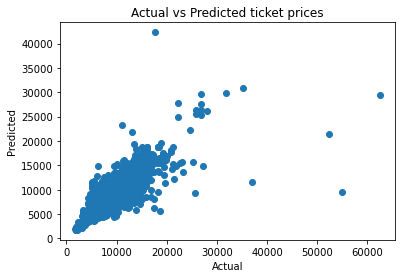

In [83]:
#This graph plots actual vs predicted values, in here the narrower the graph, better the model is performing
plt.scatter(y_test,preds)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted ticket prices")